# Import packages

In [ ]:
df = pd.read_csv('diamonds.csv')

In [ ]:
url = 'https://www.brilliantearth.com/loose-diamonds/list/?shapes=Round&min_carat=0.5&max_carat=0.5&page=1'

In [ ]:
response = requests.get(url).json()

In [ ]:
print(f'total_count: {response["total_count"]}')
print(f'page: {response["page"]}')
print(f'num_records: {len(response["diamonds"])}')
print(f'path: {response["path"]}')

In [1]:
import requests
import pandas as pd
import csv
import logging

In [2]:
logging.basicConfig(format='%(message)s', level=logging.INFO)
logger = logging.getLogger()

In [54]:
class DiamondScraper:
    
    def __init__(self, page_num=1, min_carat=0.25, max_carat=1.0):

        self.page_num = page_num
        self.min_carat = min_carat
        self.max_carat = max_carat
        self.current_carat = self.min_carat
        
        self.url = 'https://www.brilliantearth.com/loose-diamonds/list/'
        self.current_records = 0
        self.total_records = 0
        
        self.upc = []
        self.cut = []
        self.colour = []
        self.clarity = []
        self.carat = []
        self.x = []
        self.y = []
        self.z = []
        self.lw_ratio = []
        self.depth = []
        self.table = []
        self.fluorescence = []
        self.polish = []
        self.symmetry = []
        self.report = []
        self.origin = []
        self.price = []

    
    def get_diamonds(self):
        
        path = f'?shapes=Round&min_carat={self.current_carat}&max_carat={self.current_carat}&page={self.page_num}'
        full_path = self.url + path
        
        response = requests.get(full_path).json()
        
        if bool(response) == False:
            logger.info(
                f'***** Retrived {self.current_records:,} '
                f'diamonds of {self.current_carat:.2f} carat weight *****'
            )
            
            if self.current_carat < self.max_carat:
                self.current_carat += 0.01
                self.get_diamonds()
                
            else:
                logger.info(
                    f'***** Retrived {self.total_records:,} '
                    f'diamonds of {self.min_carat:.2f} - {self.max_carat:.2f} carat weight *****'
                )
        
        else:
            for diamond in response['diamonds']:
                self.upc.append(diamond['upc'])
                self.cut.append(diamond['cut'])
                self.colour.append(diamond['color'])
                self.clarity.append(diamond['clarity'])
                self.carat.append(diamond['carat'])
                measurements = diamond['measurements'].split(' x ')
                x = float(measurements[0])
                y = float(measurements[1])
                z = float(measurements[2])
                lw_ratio = round(x / y, 4)
                self.x.append(x)
                self.y.append(y)
                self.z.append(z)
                self.lw_ratio.append(lw_ratio)
                self.depth.append(diamond['depth'])
                self.table.append(diamond['table'])
                self.fluorescence.append(diamond['fluorescence'])
                self.polish.append(diamond['polish'])
                self.symmetry.append(diamond['symmetry'])
                self.report.append(diamond['report'])
                self.origin.append(diamond['origin'])
                self.price.append(diamond['price'])
                
                self.current_records += 1
                self.total_records += 1

            if response['total_count'] % 20 == 0:

                while self.page_num < (response['total_count'] / 20):
                    self.page_num += 1
                    self.get_diamonds()

                logger.info(
                    f'***** Retrived {self.current_records:,} '
                    f'diamonds of {self.current_carat:.2f} carat weight *****'
                )
                self.current_records = 0

            else:

                if len(response['diamonds']) == 20:
                    self.page_num += 1
                    self.get_diamonds()

                else:
                    logger.info(
                        f'***** Retrived {self.current_records:,} '
                        f'diamonds of {self.current_carat:.2f} carat weight *****'
                    )
                    self.current_records = 0

            if self.current_carat < self.max_carat:
                self.current_carat += 0.01
                self.page_num = 1
                self.get_diamonds()

    
    def save_csv(self, filename):
        
        header = [
            'upc', 'cut', 'colour', 'clarity', 'carat', 'x', 'y', 'z', 'lw_ratio', 'depth', 'table', \
            'fluorescence', 'polish', 'symmetry', 'report', 'origin', 'price'
        ]
        
        rows = zip(
            self.upc, self.cut, self.colour, self.clarity, self.carat, self.x, self.y, \
            self.z, self.lw_ratio, self.depth, self.table, self.fluorescence, \
            self.polish, self.symmetry, self.report, self.origin, self.price
        )
        
        with open(filename, 'w', newline='') as csv_file:
            writer = csv.writer(csv_file, quoting=csv.QUOTE_NONNUMERIC)
            writer.writerow(header)
            for row in rows:
                writer.writerow(row)
            
    

In [55]:
bling = DiamondScraper()

In [56]:
%%time
bling.get_diamonds()

***** Retrived 440 diamonds of 0.25 carat weight *****
***** Retrived 331 diamonds of 0.26 carat weight *****
***** Retrived 175 diamonds of 0.27 carat weight *****
***** Retrived 61 diamonds of 0.28 carat weight *****
***** Retrived 47 diamonds of 0.29 carat weight *****
***** Retrived 9,099 diamonds of 0.30 carat weight *****
***** Retrived 2,354 diamonds of 0.31 carat weight *****
***** Retrived 1,632 diamonds of 0.32 carat weight *****
***** Retrived 1,188 diamonds of 0.33 carat weight *****
***** Retrived 774 diamonds of 0.34 carat weight *****
***** Retrived 658 diamonds of 0.35 carat weight *****
***** Retrived 376 diamonds of 0.36 carat weight *****
***** Retrived 531 diamonds of 0.37 carat weight *****
***** Retrived 207 diamonds of 0.38 carat weight *****
***** Retrived 41 diamonds of 0.39 carat weight *****
***** Retrived 3,574 diamonds of 0.40 carat weight *****
***** Retrived 725 diamonds of 0.41 carat weight *****
***** Retrived 395 diamonds of 0.42 carat weight *****
***

***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight *****
***** Retrived 0 diamonds of 1.00 carat weight

CPU times: user 50.6 s, sys: 24.4 s, total: 1min 15s
Wall time: 19min 43s


In [58]:
bling.save_csv('test.csv')

In [59]:
len(bling.upc)

47210

In [48]:
bling.carat[-1]

1.0

In [ ]:
# diamonds.duplicated(subset='upc')
df[df.duplicated(['diamond_id'], keep=False)]

In [ ]:
df2.info()

In [ ]:
df.tail()

In [ ]:
df3 = pd.concat(
    [df, df2],
    ignore_index=True
)

In [ ]:
df3.info()

In [ ]:
df3.tail()

In [ ]:
3 + 0.01

In [ ]:
data = {"upc": "4257024Y", "active": True, "title": "0.50 Carat Round Diamond", "product_class": "Loose Diamonds", "index_id": 10322045, "shape": "Round", "price": 1065, "carat": 0.5, "color": "J", "clarity": "SI2", "cut": "Very Good", "length_width_ratio": 1, "collection": "", "report": "GIA", "origin": "Botswana Sort", "polish": "Very Good", "symmetry": "Very Good", "measurements": "5.06 x 5.03 x 3.14", "depth": 62.3, "table": 63.0, "girdle": "Slightly Thick - Thick", "culet": "None", "fluorescence": "None", "shipping_day": 6, "color_order": 1, "clarity_order": 1, "cut_order": 4, "report_order": 4, "collection_order": None, "is_memo": False, "valid": True, "has_cert": True, "certificate_number": "2364594873", "shipping_supplier": "Sheetalny", "length": 5.045, "inventory_location": [], "dedicated": False, "has_v360_video": True, "v360_src": "//css.brilliantearth.com/static/v360_viewer/Vision360.html?d=2364594873&surl=//image.brilliantearth.com/media/v360/&version=0", "diamond_blockchain": False, "diamond_dor": False, "rank_order": 12, "images": {"images": [{"caption": "top_lg", "src": "//image.brilliantearth.com/media/cache/4f/f1/4ff1cc55e37cf1244aff2c300740a8cb.jpg", "alt": "0.50 Carat Round Diamond large top view"}, {"caption": "vert", "src": "//image.brilliantearth.com/media/cache/11/24/1124f52a10efa7c396304223a9463fd4.png", "alt": "0.50 Carat Round Diamond top view with measurements"}, {"caption": "hori", "src": "//image.brilliantearth.com/media/cache/e9/4a/e94a8f78736e101f1c92e6ff574f5d7a.png", "alt": "0.50 Carat Round Diamond side view with measurements"}, {"caption": "vertsmall", "src": "//image.brilliantearth.com/media/diamond_shape/RND-Top-62x62.png", "alt": "0.50 Carat Round Diamond small top view with measurements"}, {"caption": "horismall", "src": "//image.brilliantearth.com/media/diamond_shape/RND-Side-62x62.png", "alt": "0.50 Carat Round Diamond small side view with measurements"}], "shape": [], "sort_shapes": [], "purchased": [], "thumb_images": [], "similar_purchased": [], "skin_tone": [], "real_images": []}, "index_name": "loose-diamonds", "id": 10322045, "is_new_year": False, "is_christmas": False, "is_valentines_day": True, "orderby": "Monday February 1, 2021 by 2:00 PM PT", "receiveby": "Tuesday, February 9", "receiveby_short": "Tue, Feb 9", "orderby_short": "2 PM PT today"}

In [ ]:
data

In [ ]:
data['measurements'].split(' x ')[2]

In [ ]:
test2 = pd.read_csv('test.csv')
test2.head()



In [ ]:
test2.info()

In [ ]:
round(5.06 / 5.03, 2)

In [ ]:
with open('test.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['first_name'], row['last_name'])



In [49]:
df = pd.read_csv('test.csv', dtype={'certificate_number': object})

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22698 entries, 0 to 22697
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   upc                 22698 non-null  object 
 1   cut                 22698 non-null  object 
 2   colour              22698 non-null  object 
 3   clarity             22698 non-null  object 
 4   carat               22698 non-null  float64
 5   x                   22698 non-null  float64
 6   y                   22698 non-null  float64
 7   z                   22698 non-null  float64
 8   lw_ratio            22698 non-null  float64
 9   depth               22698 non-null  float64
 10  table               22698 non-null  float64
 11  girdle              22362 non-null  object 
 12  culet               22512 non-null  object 
 13  fluorescence        22698 non-null  object 
 14  polish              22698 non-null  object 
 15  symmetry            22698 non-null  object 
 16  repo

In [51]:
df.tail()

,upc,cut,colour,clarity,carat,x,y,z,lw_ratio,depth,table,girdle,culet,fluorescence,polish,symmetry,report,origin,certificate_number,price
22693,4215690A,Super Ideal,D,IF,1.0,6.42,6.38,3.98,1.0063,62.2,57.0,Medium,None,None,Excellent,Excellent,GIA,Russia,6214303722,21175
22694,4291890A,Super Ideal,D,IF,1.0,6.40,6.38,4.01,1.0031,62.8,57.0,Medium,None,None,Excellent,Excellent,GIA,Russia,5373324940,21265
22695,4099444A,Super Ideal,D,FL,1.0,6.39,6.34,3.98,1.0079,62.6,58.0,Medium,None,None,Excellent,Excellent,GIA,Botswana Sort,6213118776,21315
22696,4290301A,Super Ideal,D,IF,1.0,6.38,6.33,4.00,1.0079,62.9,58.0,Medium,None,None,Excellent,Excellent,GIA,Russia,6214387159,21470
22697,4289962A,Super Ideal,D,IF,1.0,6.40,6.36,4.00,1.0063,62.6,58.0,Medium - Slightly Thick,None,None,Excellent,Excellent,GIA,Russia,7371068759,23300


In [52]:
df.colour.value_counts()

F    4541
D    4524
G    4446
E    3795
H    3013
I    1450
J     929
Name: colour, dtype: int64

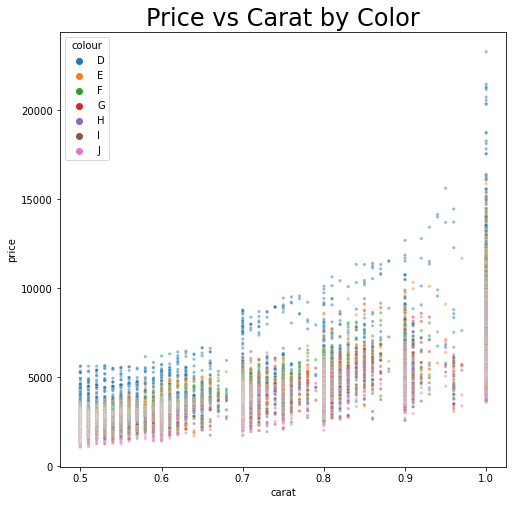

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

colours = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
colour_values = []
for i in colours:
    colour_values.append(df.colour.value_counts().loc[i])
colour_values

plt.figure(figsize=(8, 8))
sns.scatterplot(
    x='carat',
    y='price',
    data=df,
    s=10,
    hue='colour',
    alpha=0.5,
    hue_order=colors
)
plt.title('Price vs Carat by Color', size=24)
plt.show()